In [21]:
#check this -> https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, MaxPool2D
from keras.utils import to_categorical
import keras
import keras.optimizers
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop

import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import cv2

sns.set(style='white', context='notebook', palette='deep')

tf.__version__

'1.12.0'

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [23]:
def plot_images(images):

    
    #create figure with 3x3 sub-plots
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape((28,28)), cmap='binary')

        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

In [24]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#scale define, makes easier for network to learn
#x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_test = tf.keras.utils.normalize(x_test, axis=1)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)



#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)





In [25]:
for i in range(len(x_train)):
    (thresh, im_bw) = cv2.threshold(x_train[i], 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    x_train[i] = im_bw.reshape((28,28,1))
    
for i in range(len(x_test)):
    (thresh, im_bw) = cv2.threshold(x_test[i], 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    x_test[i] = im_bw.reshape((28,28,1))

In [26]:
#Model 1
"""
model = Sequential()
#args: (filters, window size, input_shape)
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
#model.add(Activation("relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
#model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
#model.add(Activation("relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
#model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', 
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=12, batch_size=128, verbose=1, validation_data=(x_test, y_test))
"""

'\nmodel = Sequential()\n#args: (filters, window size, input_shape)\nmodel.add(Conv2D(32, kernel_size=(3,3), activation=\'relu\', input_shape=(28,28,1)))\n#model.add(Activation("relu"))\n#model.add(MaxPooling2D(pool_size=(2,2)))\n\nmodel.add(Conv2D(64, kernel_size=(3,3), activation=\'relu\'))\n#model.add(Activation("relu"))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\nmodel.add(Conv2D(16, kernel_size=(3,3), activation=\'relu\'))\n#model.add(Activation("relu"))\n#model.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.25))\n\nmodel.add(Flatten())\nmodel.add(Dense(128, activation=\'relu\'))\nmodel.add(Dropout(0.5))\n\nmodel.add(Dense(10, activation=\'softmax\'))\n#model.add(Activation(\'sigmoid\'))\n\nmodel.compile(optimizer=\'adam\', loss=\'categorical_crossentropy\', \n             metrics=[\'accuracy\'])\n\nmodel.fit(x_train, y_train, epochs=12, batch_size=128, verbose=1, validation_data=(x_test, y_test))\n'

In [27]:
#Model 2 : see: https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# Define the optimizer
#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [28]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.3, 
                                            min_lr=0.00001)

epochs = 45 
batch_size = 86

In [29]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [30]:
# Fit the model
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/45
 - 236s - loss: 0.5661 - acc: 0.8492 - val_loss: 0.0554 - val_acc: 0.9816
Epoch 2/45
 - 250s - loss: 0.1656 - acc: 0.9516 - val_loss: 0.0428 - val_acc: 0.9851
Epoch 3/45
 - 246s - loss: 0.1266 - acc: 0.9620 - val_loss: 0.0363 - val_acc: 0.9875
Epoch 4/45
 - 247s - loss: 0.1168 - acc: 0.9650 - val_loss: 0.0324 - val_acc: 0.9886
Epoch 5/45
 - 240s - loss: 0.1080 - acc: 0.9684 - val_loss: 0.0372 - val_acc: 0.9865
Epoch 6/45
 - 306s - loss: 0.1026 - acc: 0.9707 - val_loss: 0.0273 - val_acc: 0.9901
Epoch 7/45
 - 272s - loss: 0.0941 - acc: 0.9727 - val_loss: 0.0256 - val_acc: 0.9916
Epoch 8/45
 - 214s - loss: 0.0900 - acc: 0.9740 - val_loss: 0.0367 - val_acc: 0.9887
Epoch 9/45
 - 264s - loss: 0.0876 - acc: 0.9742 - val_loss: 0.0309 - val_acc: 0.9886
Epoch 10/45
 - 220s - loss: 0.0894 - acc: 0.9741 - val_loss: 0.0243 - val_acc: 0.9929
Epoch 11/45
 - 210s - loss: 0.0839 - acc: 0.9758 - val_loss: 0.0367 - val_acc: 0.9896
Epoch 12/45
 - 227s - loss: 0.0874 - acc: 0.9756 - val_loss: 0.

In [40]:
model_name = 'binary_model_99_45epochs.model'
model.save(model_name)

In [41]:
model = tf.keras.models.load_model(model_name)

In [33]:
img = cv2.imread("5.png")

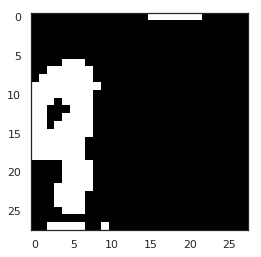

In [34]:
plt.imshow(img)

In [35]:
img = np.resize(img, (1,28,28,1))
model.predict(img)

array([[9.9925368e-10, 9.2593982e-06, 4.7118413e-01, 5.1905346e-01,
        4.9413840e-10, 1.2485350e-03, 2.2284439e-08, 8.4052542e-03,
        9.7283351e-05, 2.0002083e-06]], dtype=float32)

In [36]:
np.argmax(model.predict(img))

3

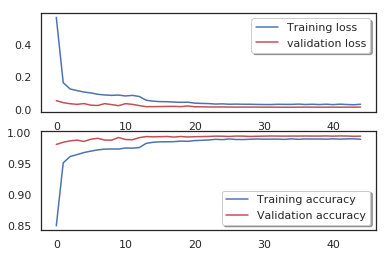

In [37]:
X_val = x_test
Y_val = y_test

# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

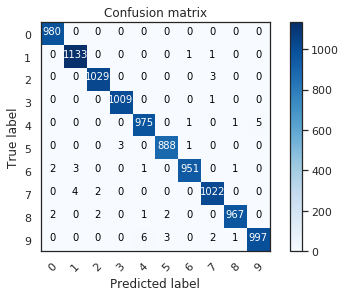

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

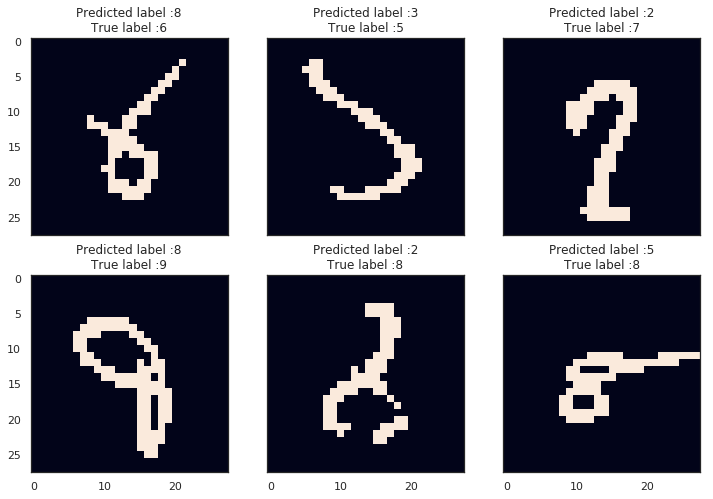

In [39]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(12,8))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)